### <font color='blue'>In this excersise we will learn as well as build our very own machine learning application </font>

##### Customers give reviews to restaurants on platforms like zomato, Yelp etc. It is difficult to manually go and see whether new review written is good or bad. So lets build an application which will automatically tell whether new review is good or bad.

What we need to build is a binary classifier -> For which input is text of review and output is :
 - 1 (for good review) 
 - 0 (for bad review)

#### Lets import necessary libraries for the same

In [369]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as ttSplit
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve
import scikitplot as skplt 
import matplotlib.pyplot as plt
from collections import Counter
 

#### Importing the dataset

In [370]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

#### Do you want to see how our data looks like?

In [371]:
print(dataset.head(10))

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1


#### But this data looks messy. Look at first line itself. 'Wow..'. Those  three dots are . not helping us to know anything right? Let's clean this data

In [372]:
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(corpus[:5])
wordnet_lemmatizer = WordNetLemmatizer()
cleanData = list(map(wordnet_lemmatizer.lemmatize, corpus))  

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


Vectorizations of words: This step converts word in to a vector of real numbers. Each vector uniquely describe a word and there distance tells about there resemblance.

In [373]:
total_features = 1500

In [374]:
cv = CountVectorizer(max_features=total_features)
X = cv.fit_transform(cleanData).toarray()
y = dataset.iloc[:, 1].values  

In [375]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

#### In order to build model we will first train it on some part of the available data and then test the performance on remaining data. This is standard procedure in building machine learning application.


In [376]:
X_train, X_test, y_train, y_test = ttSplit(X, y, test_size = 0.20, random_state = 0)

#### Now lets take one classification algorithm and use it to train our model  

In [377]:
lr = LogisticRegression()

In [378]:
### Fitting model
lr.fit(X_train, y_train)

### Predicting results for test data
y_pred = lr.predict(X_test)

##### Prediction we made using our model needs to be compared with actual test data. This will tell us about accuracy.


In [379]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.78      0.72        97
          1       0.76      0.64      0.69       103

avg / total       0.72      0.71      0.71       200



##### <font color='green'>Note that f1-score is harmonic mean of precision and recall. And it is often used to measure performance of classification. particularly when your data do not have 50-50 good and bad reviews.</font>

### Should we plot the results to visualize better?

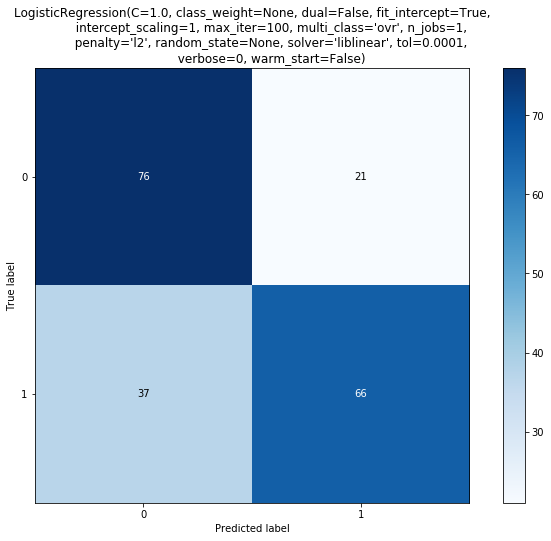

In [380]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=False, title=lr)
plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.show()

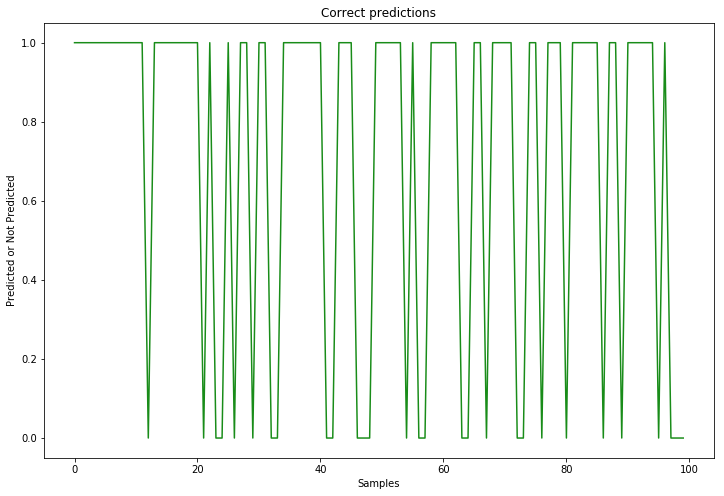

In [381]:
corrects = [1 if y_test[i] == y_pred[i] else 0 for i in range(len(y_test))]
wrongs = [1 if corrects[i] == 0 else 0 for i in range(len(y_test))]
plt.plot(corrects[:100],alpha=0.9, color = 'green')
# plt.plot(wrongs[:50],alpha=0.6, color = 'red')
plt.xlabel('Samples')
plt.ylabel('Predicted or Not Predicted')
plt.title('Correct predictions')
plt.legend(loc="lower right")
fig=plt.figure(figsize=(50, 64), dpi= 200)
plt.show()

#### Lets analyze some sentences where our model failed.

In [382]:
wrongly_predicted = [i for i in range(len(y_test)) if corrects[i] == 0]
bad_terms = []
for i in range(len(wrongly_predicted)):
    terms = cv.inverse_transform(X_test[wrongly_predicted[i]])
    if bad_terms is None:
        bad_terms = list(terms[0])
    else:
        bad_terms = bad_terms + list(terms[0])
badCounts = Counter(bad_terms)

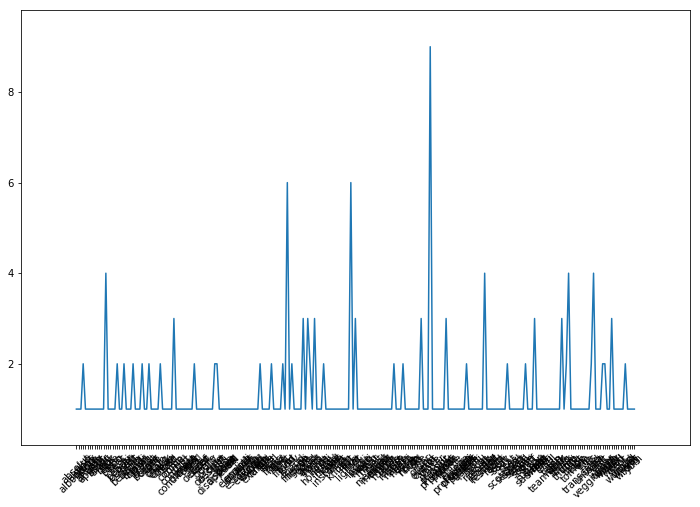

In [383]:
bad_Counts = sorted(badCounts.items()) # sorted by key, return a list of tuples
words, cnt = zip(*bad_Counts) # unpack a list of pairs into two tuples
plt.plot(words, cnt)
plt.rcParams['figure.figsize'] = [25.0, 8.0]
plt.margins(0.1)
plt.xticks(words, rotation='45')
plt.show()

In [384]:
thresh = 2
bads = []
for k, v in sorted(badCounts.items()):
    if int(v) > thresh:
        bads.append(k)
print("Ambiguous words where classification failed :", bads)
num_bads = len(bads)

Ambiguous words where classification failed : ['back', 'come', 'food', 'go', 'good', 'help', 'like', 'lot', 'order', 'place', 'pretti', 'restaur', 'sushi', 'thing', 'time', 'vega', 'way']


#### ROC

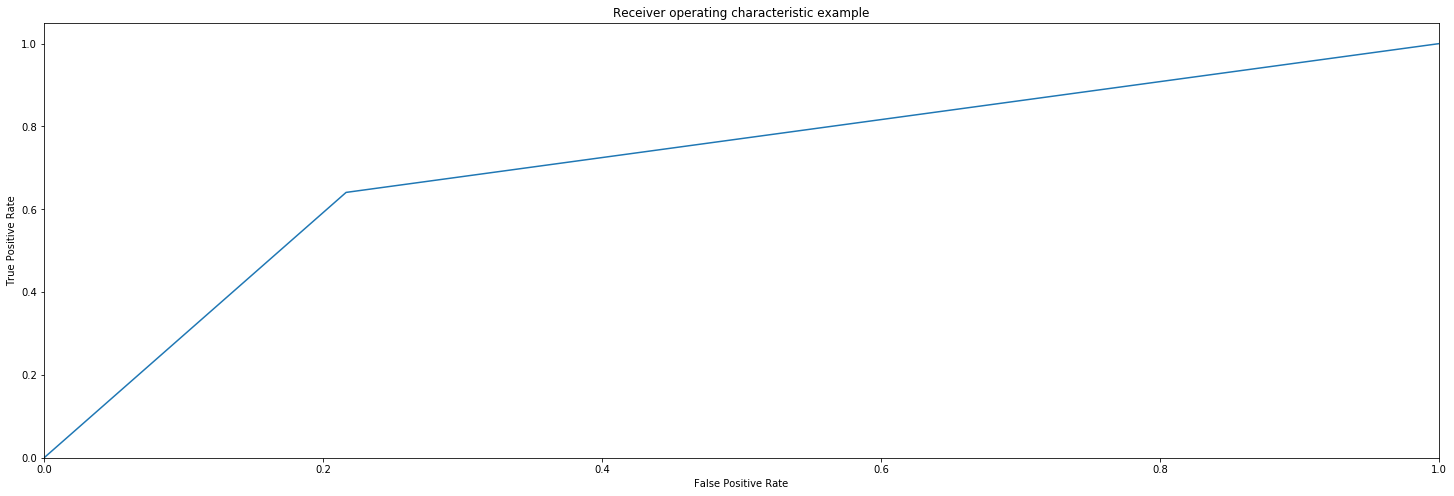

In [385]:
fps , tps, x  = roc_curve(y_test, y_pred, drop_intermediate=True)
plt.plot(fps, tps)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [386]:
newCleanData = []
for review in cleanData:
    review = list(set(review.split())^set(bads))
    review = ' '.join(review)
    newCleanData.append(review)

In [387]:
cv = CountVectorizer(max_features=total_features)
Xnew = cv.fit_transform(newCleanData).toarray()
ynew = dataset.iloc[:, 1].values 
X_train, X_test, y_train, y_test = ttSplit(Xnew, ynew, test_size = 0.20, random_state = 0)
lr = LogisticRegression()
### Fitting model
lr.fit(X_train, y_train)

### Predicting results for test data
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.79      0.73        97
          1       0.76      0.63      0.69       103

avg / total       0.72      0.71      0.71       200



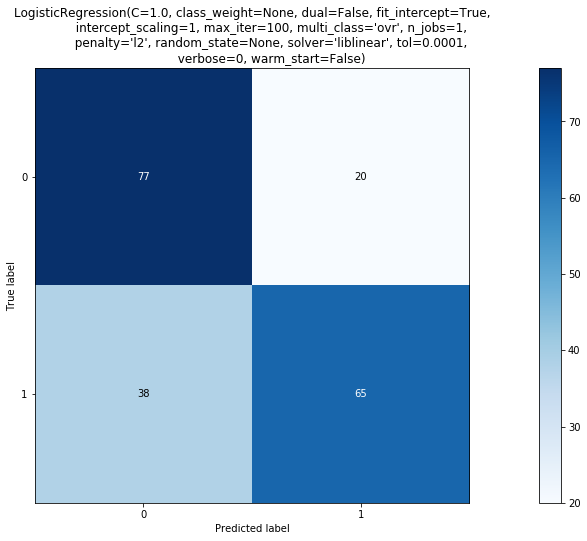

In [388]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=False, title=lr)
plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.show()